In [3]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [4]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [5]:
data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_and_southern_transect_gps_new2.dat")

#data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")
data

15/07/24 - 09:09:04 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 100 data: 1489, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

15/07/24 - 09:09:06 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (10.3s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\9213601995764142367


15/07/24 - 09:09:06 - pyGIMLi - INFO - Cache C:\Users\mealiy001\Projects\tuk_island\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2106680221111179834


1489 [2188.8844033171617,...,31.558615980964884]

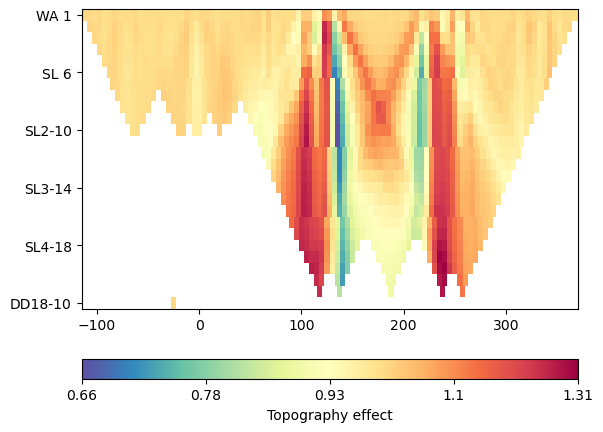

In [6]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

In [1]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err'])
data.remove(data["err"] > 0.1)


NameError: name 'ert' is not defined

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a85dcd3f10>)

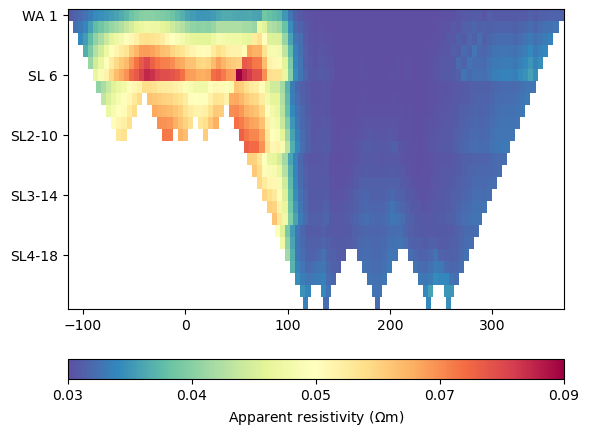

In [35]:
ert.show(data, data['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a831cf4fd0>)

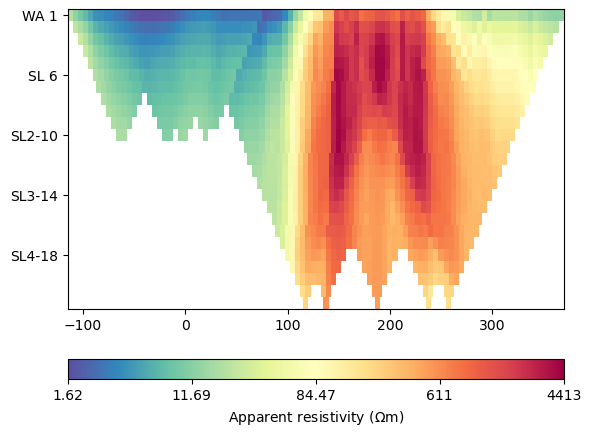

In [9]:
ert.showData(data)

18/06/24 - 10:56:17 - pyGIMLi - INFO - Found 2 regions.
18/06/24 - 10:56:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/06/24 - 10:56:17 - pyGIMLi - INFO - Found 2 regions.
18/06/24 - 10:56:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/06/24 - 10:56:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/06/24 - 10:56:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/06/24 - 10:56:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4767 Cells: 8856 Boundaries: 6980
18/06/24 - 10:56:17 - pyGIMLi - INFO - Use median(data values)=234.76
18/06/24 - 10:56:17 - pyGIMLi - INFO - Created startmodel from forward operator: 1935, min/max=234.760000/234.760000
18/06/24 - 10:56:17 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000141D0F14130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000141D0F14770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000141D0F142C0>
min/max (data): 1.62/4413
min/max (error): 3%/11.2%
min/max (start model): 235/235
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3317.64
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  466.62 (dPhi = 85.78%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  171.29 (dPhi = 63.13%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   69.65 (dPhi = 57.71%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   35.46 (dPhi = 48.27%) lam: 10.0
---------------

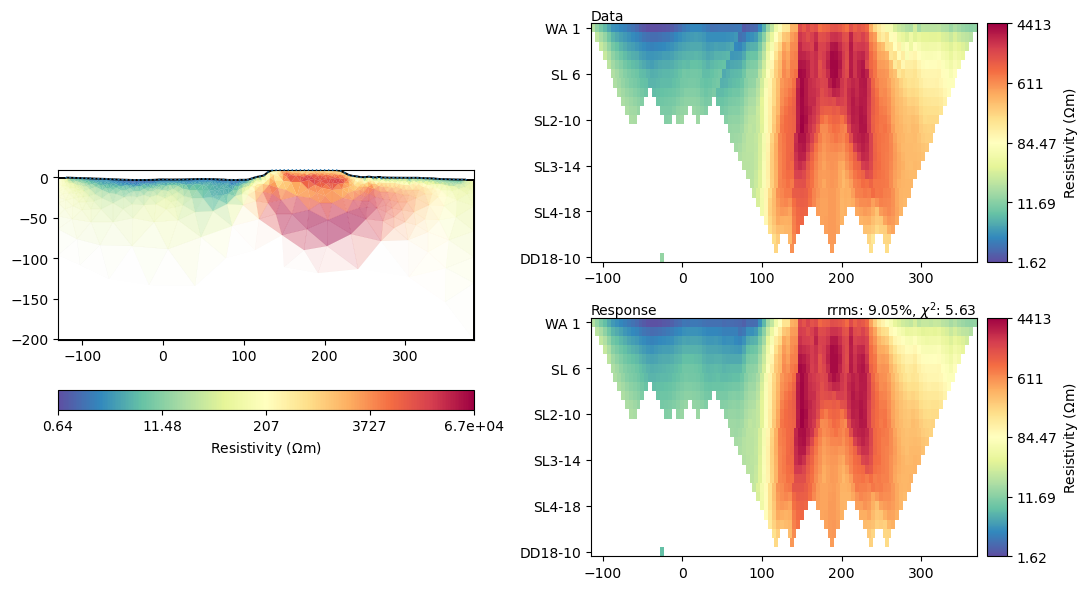

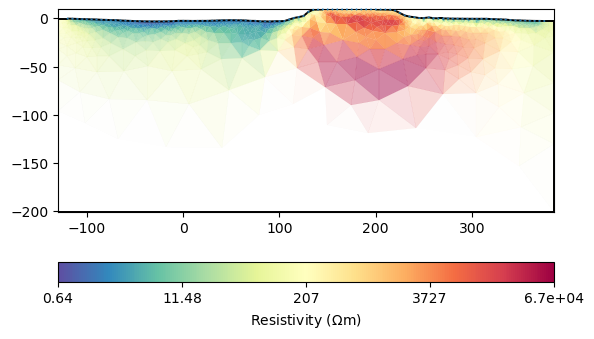

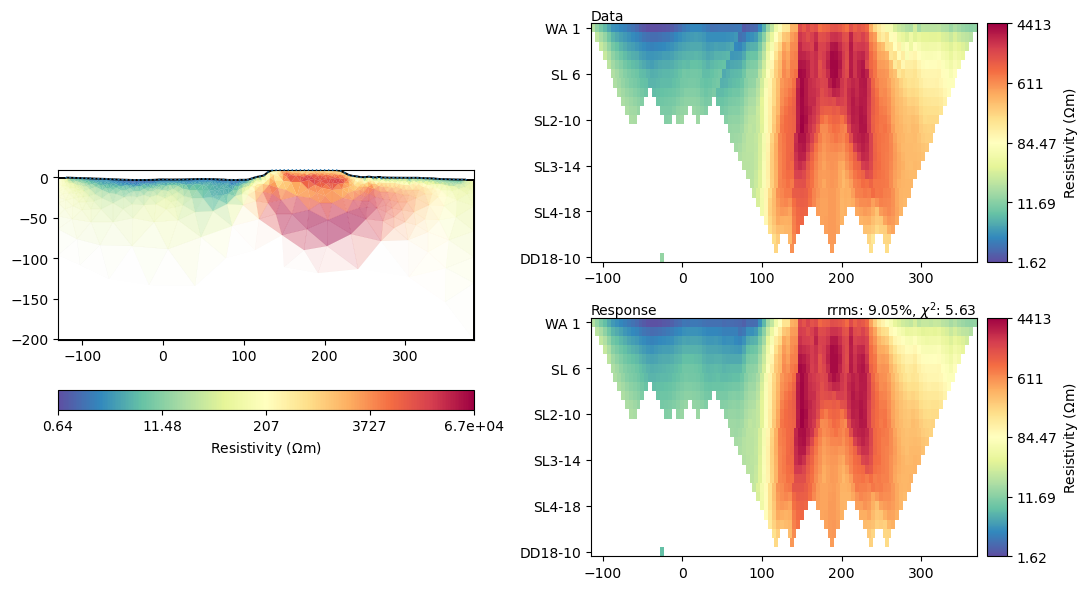

In [7]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)

mgr.showResult()
mgr.showResultAndFit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x141eaedf3d0>)

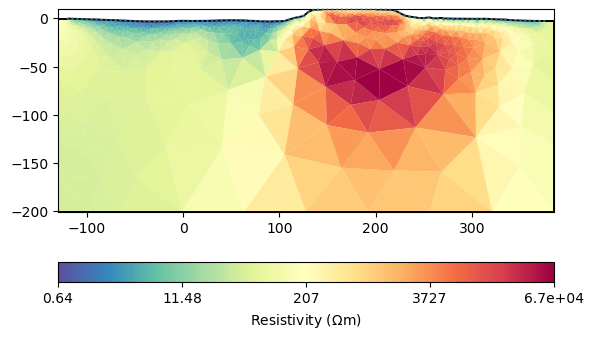

In [8]:
mgr.showResult(cMap="Spectral_r", logScale=True, coverage=1)

In [10]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, boundary=1)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())

0 -130.00257158134846 -0.2462
1 -130.00257158134846 -200.745
2 385.0025715813485 -200.745
3 385.0025715813485 -2.745
4 -625.0025715813484 -0.2462
5 -625.0025715813484 -693.2462
6 880.0025715813485 -2.745
7 880.0025715813485 -695.745
8 -120.0 -0.2462
9 -118.75 -0.27455
10 -116.25 -0.33125
11 -115.0 -0.3596
12 -113.75 -0.405875
13 -111.25 -0.49842499999999995
14 -110.0 -0.5447
15 -108.75 -0.5834999999999999
16 -106.25 -0.6611
17 -105.0 -0.6999
18 -103.75 -0.73575
19 -101.25 -0.80745
20 -100.0 -0.8433
21 -98.75 -0.8896000000000001
22 -96.25 -0.9822
23 -95.0 -1.0285
24 -93.75 -1.0568499999999998
25 -91.25 -1.11355
26 -90.0 -1.1419
27 -88.75 -1.2165499999999998
28 -86.25 -1.36585
29 -85.0 -1.4405
30 -83.75 -1.46885
31 -81.25 -1.52555
32 -80.0 -1.5539
33 -78.75 -1.6001750000000001
34 -76.25 -1.692725
35 -75.0 -1.739
36 -73.75 -1.768825
37 -71.25 -1.828475
38 -70.0 -1.8583
39 -68.75 -1.93575
40 -66.25 -2.09065
41 -65.0 -2.1681
42 -63.75 -2.2187
43 -61.25 -2.3198999999999996
44 -60.0 -2.3705
4

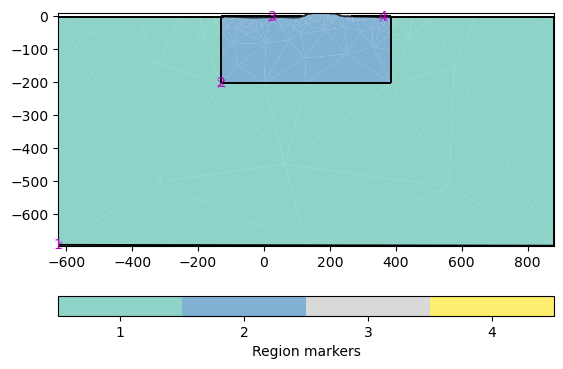

In [11]:
l1 = mt.createLine([-130.00257158134846,0], [-130.00257158134846, -5])
l2 = mt.createLine([-130.00257158134846,0], [114.46263419360339, 0])
l3 = mt.createLine([265.47100473984017,0], [385.0025715813485, 0])
l4 = mt.createLine([385.0025715813485,0], [385.0025715813485, -5])


plc2 = mt.mergePLC([plc, l1, l2, l3, l4])
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
#ax.set_ylim(-20)
#ax.set_xlim(-130,381)

15/07/24 - 09:09:38 - pyGIMLi - INFO - Found 4 regions.
15/07/24 - 09:09:38 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/07/24 - 09:09:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/07/24 - 09:09:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/07/24 - 09:09:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 9886 Cells: 18748 Boundaries: 14572
15/07/24 - 09:09:39 - pyGIMLi - INFO - Use median(data values)=234.79
15/07/24 - 09:09:39 - pyGIMLi - INFO - Created startmodel from forward operator: 4416, min/max=234.790000/234.790000
15/07/24 - 09:09:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001A830750040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001A8307504A0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001A830722960>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001A831B48510>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x000001A831B4AFF0>
min/max (data): 1.62/4413
min/max (error): 3%/9.07%
min/max (start model): 235/235
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 3205.48
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  564.06 (dPhi = 82.25%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  155.88 (dPhi = 72.15%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   83.97 (dPhi = 44.38%) lam: 10.0
-----

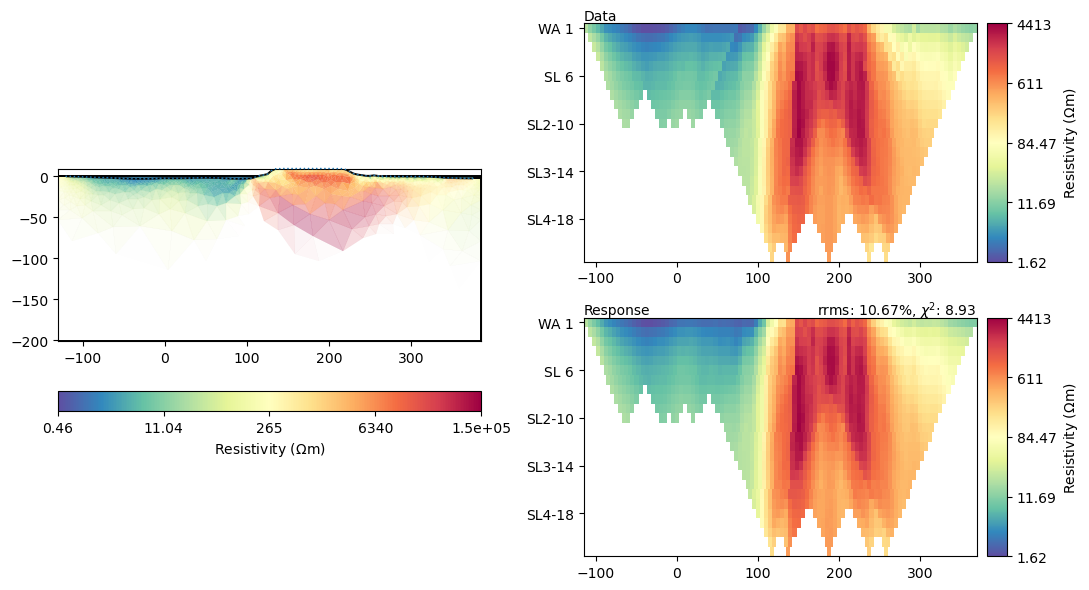

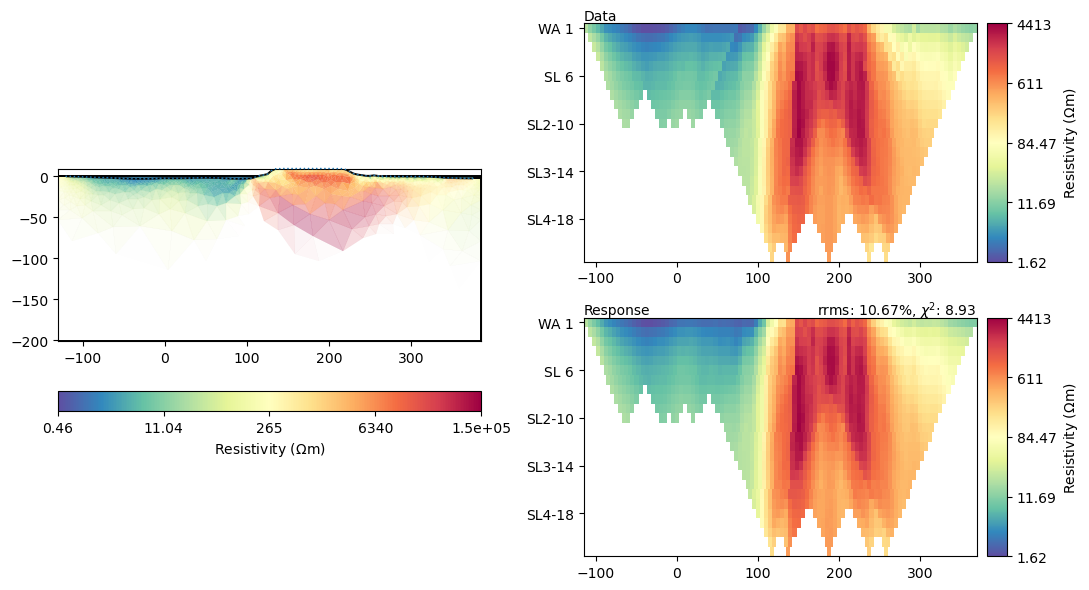

In [12]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[1, 2], zWeight=0.1)
mgr.inv.setRegularization(4, limits=[3, 4], zWeight=0.1)

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)
#mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, zWeight=0.4, RobustData=True, BlockyModel=True)

#mgr.showResult()
mgr.showResultAndFit()

25/06/24 - 09:52:14 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_and_south\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_and_south\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_and_south\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

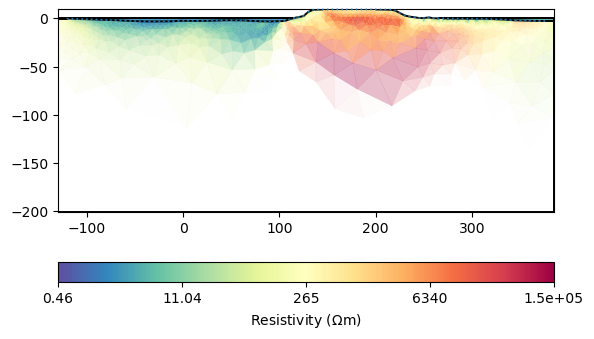

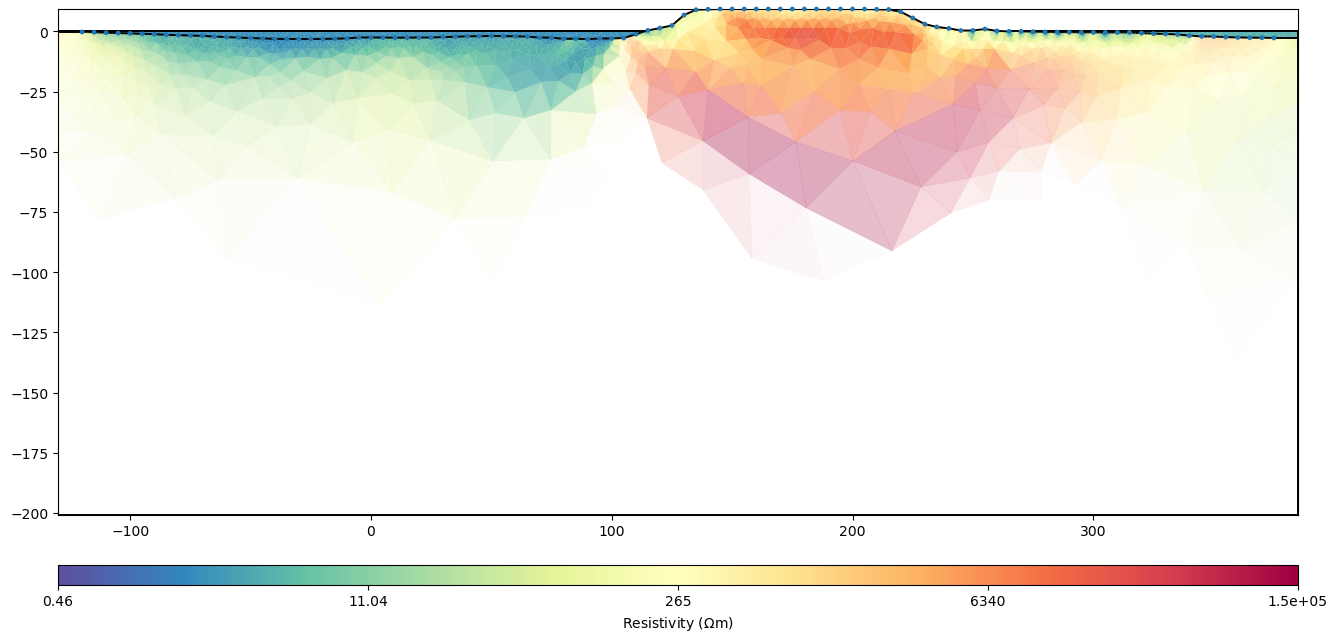

In [38]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Eastern_and_south')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a85a5b2d10>)

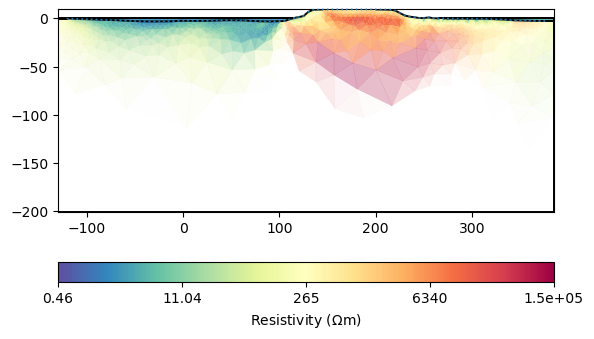

In [20]:
mgr.showResult(cMap="Spectral_r", logScale=True)

In [31]:
with open(dir+'processing/shoreline/joined_east.pkl', 'rb') as f:
    joined_east = pickle.load(f)

In [32]:
eastshore = joined_east[['year', 'xc', 'zc']].to_numpy()
eastshore[:, 1] = eastshore[:, 1].round(decimals=0)
eastshore[:, 2] = eastshore[:, 2].round(decimals=1)

#np.around(eastshore[:,1], decimals=3)

In [33]:
posVec2 = [pg.Pos(pos) for pos in zip(eastshore[:, 1], eastshore[:, 2])]
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec2)

# Get the model values for all positions
resMesh2 = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out2 = np.column_stack((eastshore[:, 1], eastshore[:, 2], resMesh2, eastshore[:, 0]))
out2 = np.c_[ out2, 2023 - out2[:, 3] ]

out2

15/07/24 - 14:04:33 - pyGIMLi - INFO - Found 1 regions.


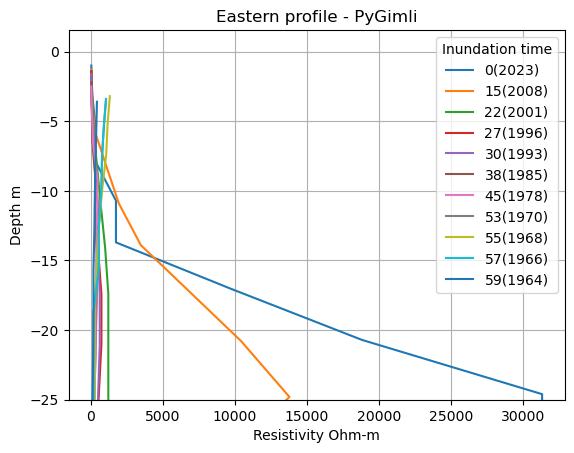

In [34]:
# Extracting unique years from the data
years = np.unique(out2[:, 4])

# Plotting each year's resistivity values with depth
for year in years:
    # Selecting data for the current year
    data_year = out2[out2[:, 4] == year]
    data_year_time = out2[out2[:, 3] == year]
    # Sorting the data based on depth
    
    # Plotting
    plt.plot(data_year[:, 2], data_year[:, 1], label=str(int(year)) + f'({int(2023 - year)})')

# Adding labels and legend
plt.ylabel('Depth m')
plt.ylim(-25)
plt.xlabel('Resistivity Ohm-m')
plt.title('Eastern profile - PyGimli')
plt.legend(title='Inundation time')
plt.grid(True)
plt.show()

l1 = mt.createLine([-130.00257158134846,0], [-130.00257158134846, -5])
l2 = mt.createLine([-130.00257158134846,0], [114.46263419360339, 0])
l3 = mt.createLine([265.47100473984017,0], [385.0025715813485, 0])
l4 = mt.createLine([385.0025715813485,0], [385.0025715813485, -5])

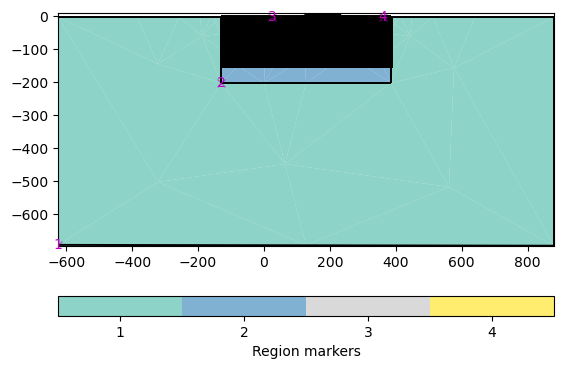

In [19]:
from pygimli.frameworks import PriorModelling


topography_coords = np.loadtxt(dir + "res2dinv_inputs/eastern_topo.txt")
xmin = -130
xmax = 385
ymin = -150
resolution_x = 0.5
resolution_y = 0.5
shave_off_top = 0.5  # Amount to shave off from the top

# Interpolate topography points
interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')

# Create x coordinates for the grid
x = np.arange(xmin, xmax + resolution_x, resolution_x)

# Create an empty list to store the adjusted y-values
adjusted_topography = []

# Iterate over each x-coordinate and adjust the corresponding y-value by subtracting the shave off value
for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  # Ensure the adjusted y-value doesn't go below ymin
    adjusted_topography.append(adjusted_y_val)

# Convert the list of adjusted y-values to a numpy array
adjusted_topography = np.array(adjusted_topography)

# Create a positional vector
grid_points = []
for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

# Convert the list of grid points to a numpy array
grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]

# Plot the results

ax, _ = pg.show(plc2)
ax.scatter(grid_points[:, 0], grid_points[:, 1], s=1, color='black')  # Plot grid points



    



In [20]:
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec)

# Get the model values for all positions
resMesh = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

21/06/24 - 11:14:06 - pyGIMLi - INFO - Found 1 regions.


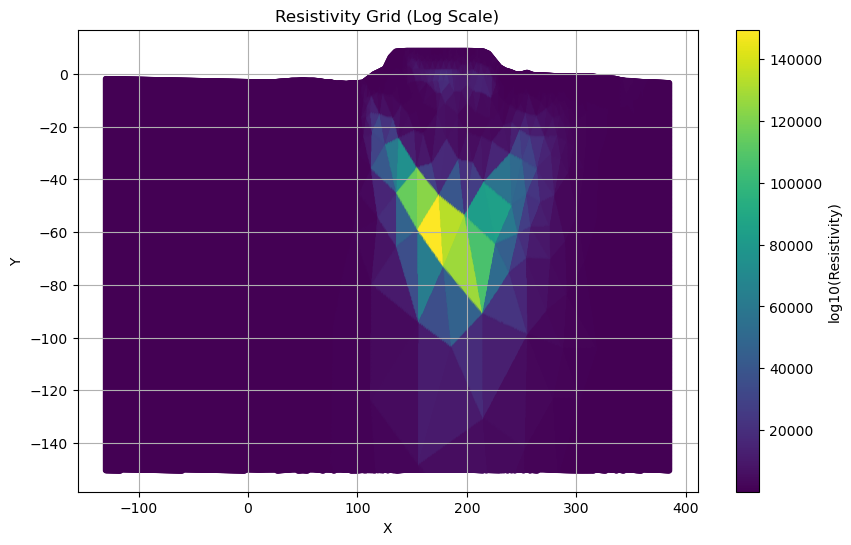

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'out' contains your data with x, y, and resistivity values
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]

# Plotting the grid with colorbar on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=resistivity_values, cmap='viridis', s=10)  # Apply log10 to resistivity values
plt.colorbar(label='log10(Resistivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Resistivity Grid (Log Scale)')
plt.grid(True)
plt.show()

In [22]:
permafrost_data = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    # Find the first depth where the gradient is negative and its absolute value is higher than 0.5
    negative_gradients_mask = (data_x[:, 2] > 10) & (resistivity_gradient_log < 0)
    valid_depths = data_x[:, 1][negative_gradients_mask]
    valid_gradients = resistivity_gradient_log[negative_gradients_mask]

    # If valid depths are found, take the first one
    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

# Convert permafrost_data to numpy array
top_permafrost_depths = np.array(permafrost_data)

In [16]:
top_permafrost_depths = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    # Filter gradients based on criteria
    valid_gradients_mask = (data_x[:, 2] > 10) & (np.abs(resistivity_gradient_log) > 0.02) & (resistivity_gradient_log < 0)  # Only positive gradients
    valid_gradients = resistivity_gradient_log[valid_gradients_mask]
    valid_depths = data_x[:, 1][valid_gradients_mask]

    # Find depth of the top of permafrost table with the maximum positive gradient
    if len(valid_depths) > 0:
        max_gradient_index = np.argmax(valid_gradients)
        top_permafrost_depth = valid_depths[max_gradient_index]
        max_gradient_value = valid_gradients[max_gradient_index]
        top_permafrost_depths.append((x_value, top_permafrost_depth, max_gradient_value))


# Convert top_permafrost_depths to numpy array
top_permafrost_depths = np.array(top_permafrost_depths)

print("Top permafrost depths for each unique x value:")
print(top_permafrost_depths)




Top permafrost depths for each unique x value:
[[-1.00000000e+01 -5.94360000e+01 -1.87798625e-01]
 [-9.50000000e+00 -4.24404000e+01 -1.59270536e-01]
 [-9.00000000e+00 -4.24448000e+01 -1.59270536e-01]
 ...
 [ 3.79000000e+02 -5.88282000e+01 -3.07757567e-02]
 [ 3.79500000e+02 -5.88386000e+01 -3.07757567e-02]
 [ 3.80000000e+02 -5.93490000e+01 -3.07757567e-02]]


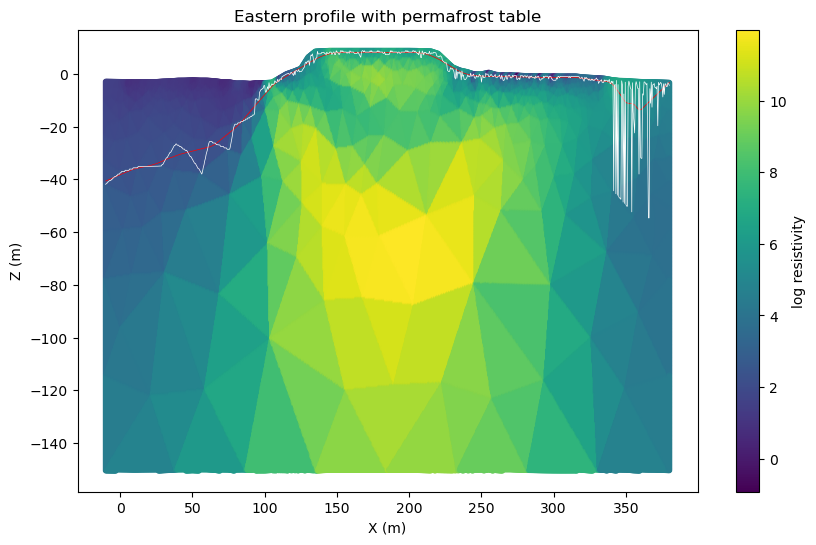

In [69]:
import statsmodels.api as sm

x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0] 


plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, c=np.log(resistivity_values),cmap='viridis', s=10)  
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Eastern profile with permafrost table')


lowess = sm.nonparametric.lowess
frac = 0.1  
ibpt_depth_smoothed = lowess(ibpt_depth, ibpt_x, frac=frac)[:, 1]

np.save(dir+ 'pygimli/eastern_perm_table_smooth.npy', ibpt_depth_smoothed)
np.save(dir+ 'pygimli/eastern_perm_table.npy', ibpt_depth)
np.save(dir+ 'pygimli/eastern_perm_table_x.npy', ibpt_x)

plt.plot(ibpt_x, ibpt_depth_smoothed, color='r', linewidth=0.5)
plt.plot(ibpt_x, ibpt_depth, color='w', linewidth=0.5)
#plt.plot(ibpt_x, adjusted_topography+0.5, color='b', linewidth=0.5)



In [301]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25,  paraDepth=50, balanceDepth=True, boundary=1)
#world=mt.createWorld([-10, 10], [380, -45])

(<Axes: >, None)

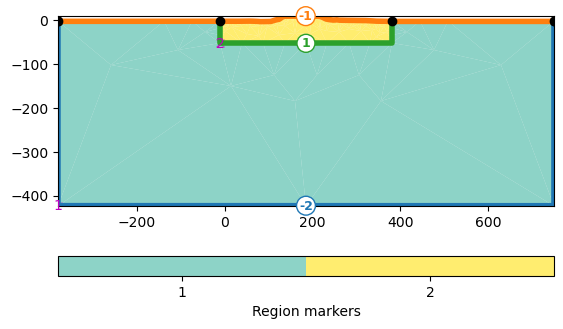

In [302]:
pg.show(plc, markers=True)

(-100.0, 500.0)

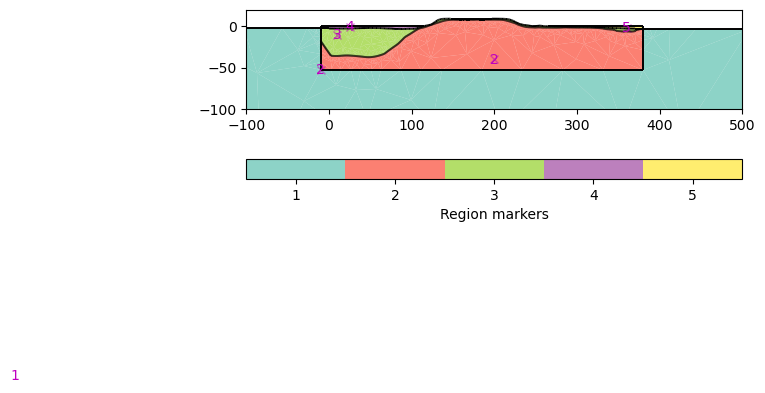

In [359]:
ibpt = np.column_stack((ibpt_x, ibpt_depth_smoothed))
ibptreg = mt.createPolygon(ibpt, markerPosition=[10, -10], boundary=2)
#topo = np.column_stack((ibpt_x, adjusted_topography+0.5))
#toporeg = mt.createPolygon(topo)
l1 = mt.createLine([-10,0], [-10, -5], boundary=-1)
l2 = mt.createLine([-10,0], [114.46263419360339, 0], boundary=-1)
l3 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0], boundary=-1)
l4 = mt.createLine([380.40414484508244,0], [380.40414484508244, -5], boundary=-1)

plc_new = plc + l1 + l2 + l3 + l4 + ibptreg
plc_new.addRegionMarker([200, -40], marker=2)
  
plc_new.addRegionMarker([10, -10], marker=3) 
plc_new.addRegionMarker([25, -1], marker=4)   
plc_new.addRegionMarker([360, -1.5], marker=5)
ax, _ = pg.show(plc_new, markers=False)
ax.set_ylim(-100, 20)
ax.set_xlim(-100,500)

(-11.0, 381.0)

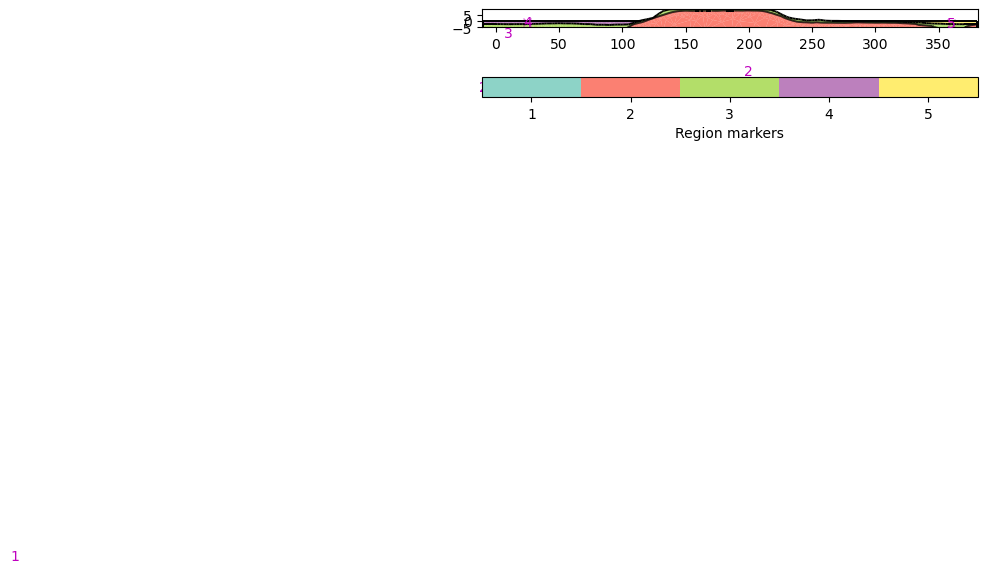

In [338]:
ax, _ = pg.show(plc_new)
ax.set_ylim(-5)
ax.set_xlim(-11,381)

(<Axes: >, None)

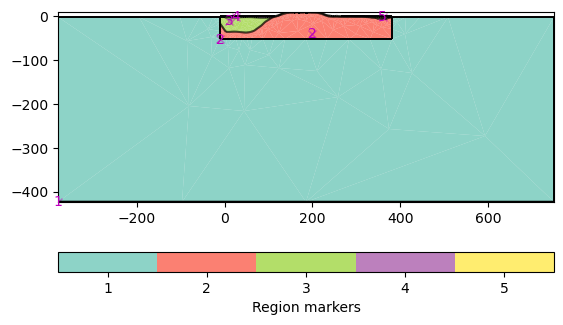

In [339]:
pg.show(plc_new)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26e06044990>)

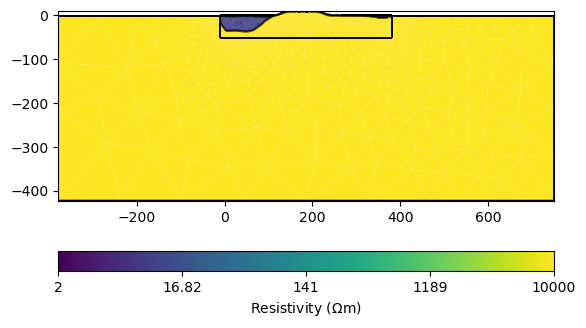

In [362]:

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh_mod = mt.createMesh(plc_new, quality=34)


# Create a map to set resistivity values in the appropriate regions
# [[regionNumber, resistivity], [regionNumber, resistivity], [...]
rhomap = [[1, 1.],
          [2, 10000.],
          [3, 10.],
          [4, 2.],
          [5, 4]]

rhomap2 = [[1, 1.],
          [2, 10000.],
          [3, 10.],
          [4, 10000.],
          [5, 10000]]

rhomap3 = [[1, 1.],
          [2, 10000.],
          [3, 10.],
          [4, 100.],
          [5, 100]]

rhomap4 = [[1, 10000.],
          [2, 10000.],
          [3, 10.],
          [4, 2.],
          [5, 4]]

# Take a look at the mesh and the resistivity distribution
pg.show(mesh_mod, logScale=True, data=rhomap4, label=pg.unit('res'), showMesh=False, showNodes=True)

In [341]:
data2 = ert.simulate(mesh_mod, scheme=data, res=rhomap)

#pg.info(np.linalg.norm(data2['err']), np.linalg.norm(data2['rhoa']))
#pg.info('Simulated data', data2)
#pg.info('The data contains:', data2.dataMap().keys())

#pg.info('Simulated rhoa (min/max)', min(data2['rhoa']), max(data2['rhoa']))
#pg.info('Selected data noise %(min/max)', min(data2['err'])*100, max(data2['err'])*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26d9a30c7d0>)

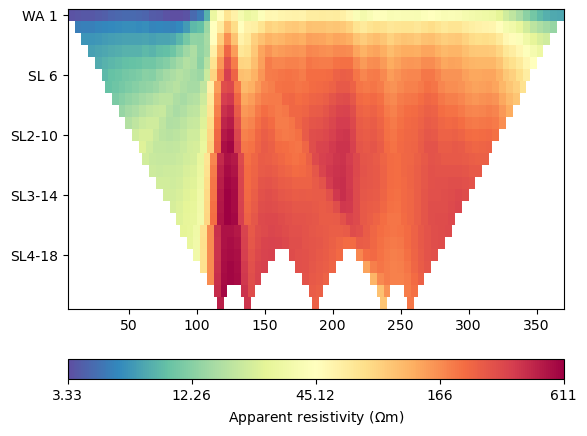

In [342]:
ert.show(data2)

14/05/24 - 10:12:41 - pyGIMLi - INFO - Use median(data values)=190.21524703166176
14/05/24 - 10:12:41 - pyGIMLi - INFO - Created startmodel from forward operator: 9083, min/max=190.215247/190.215247
14/05/24 - 10:12:41 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026A4922C4A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026A4716F790>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000026D9BF3F920>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000026D9BF3C270>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000026D9BF3F370>
min/max (data): 3.33/611
min/max (error): 3%/9.07%
min/max (start model): 190/190
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  994.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  188.61 (dPhi = 80.98%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   78.08 (dPhi = 58.45%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.20 (dPhi = 87.35%) lam: 10.0
------

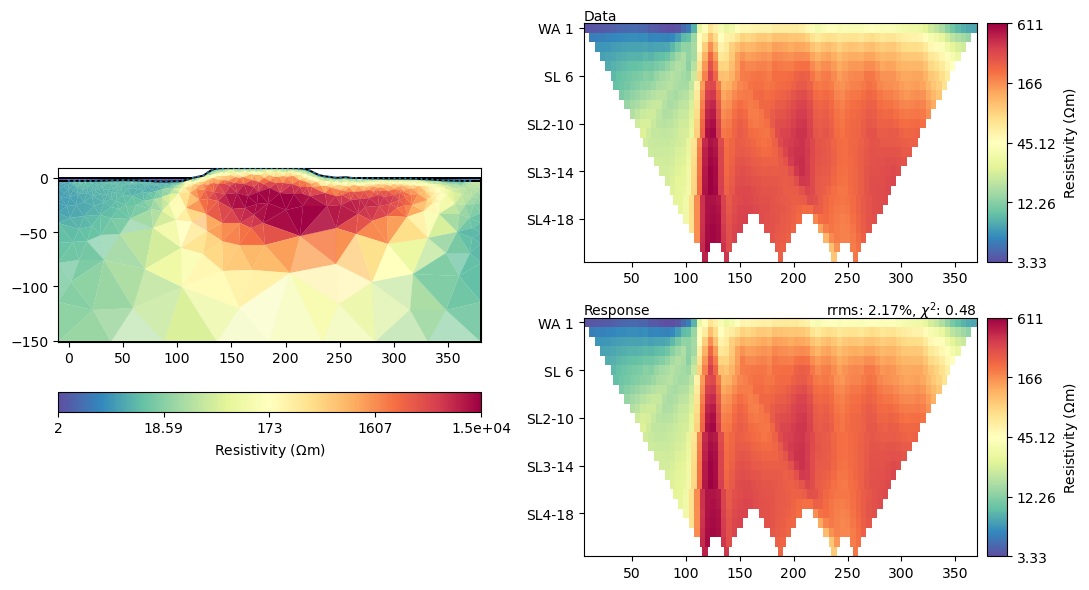

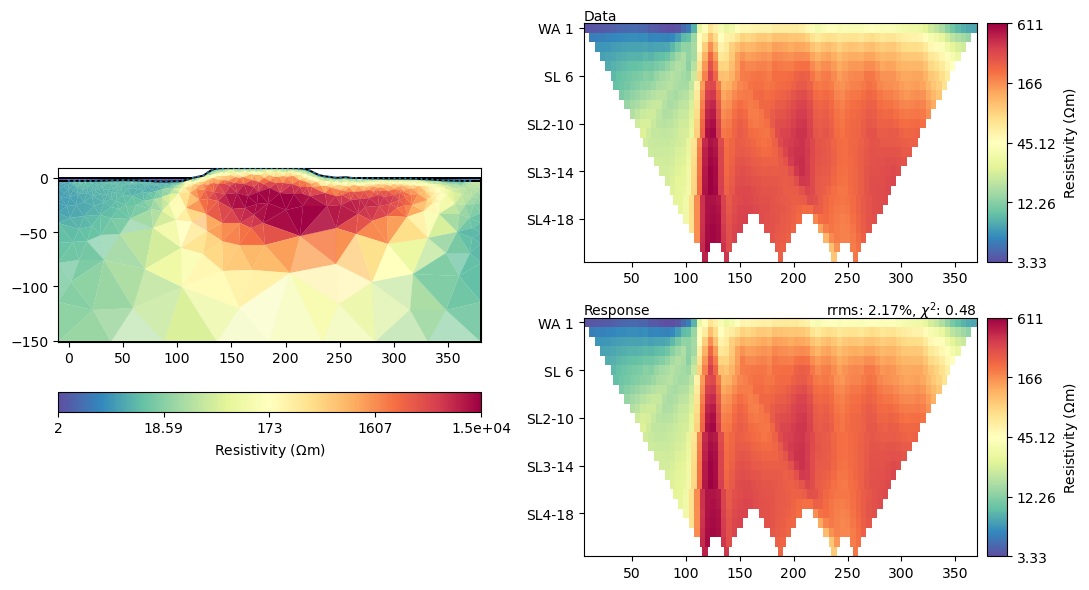

In [343]:
inv = mgr.invert(data2, lam=10, verbose=True)
mgr.showResultAndFit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26e01e47d90>)

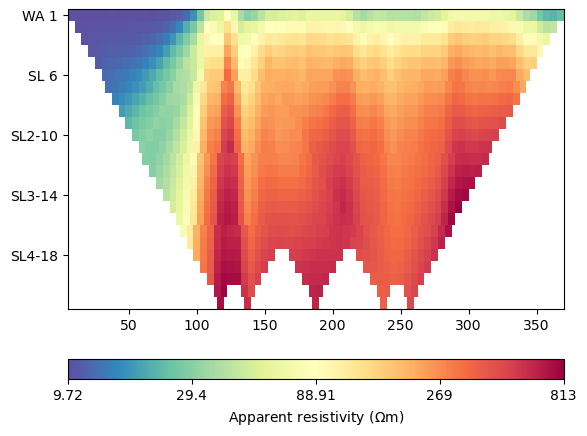

In [346]:
data3 = ert.simulate(mesh_mod, scheme=data, res=rhomap2)
ert.show(data3)

14/05/24 - 10:25:24 - pyGIMLi - INFO - Use median(data values)=255.16059526897237
14/05/24 - 10:25:24 - pyGIMLi - INFO - Created startmodel from forward operator: 9083, min/max=255.160595/255.160595
14/05/24 - 10:25:24 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026A4922C4A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026A4716F790>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000026DF8E9CC10>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000026DF8E9F1B0>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000026DF8E9C190>
min/max (data): 9.72/813
min/max (error): 3%/9.07%
min/max (start model): 255/255
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  765.03
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  380.16 (dPhi = 50.26%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  216.06 (dPhi = 42.71%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  178.87 (dPhi = 17.21%) lam: 10.0
------

14/05/24 - 10:38:28 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.run(c:\Users\mealiy001\AppData\Local\anaconda3\envs\pg\Lib\site-packages\pygimli\frameworks\inversion.py:685)
One step failed. Aborting and going back to last model


chi² =  145.21 (dPhi = 0.00%) lam: 10.0
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################


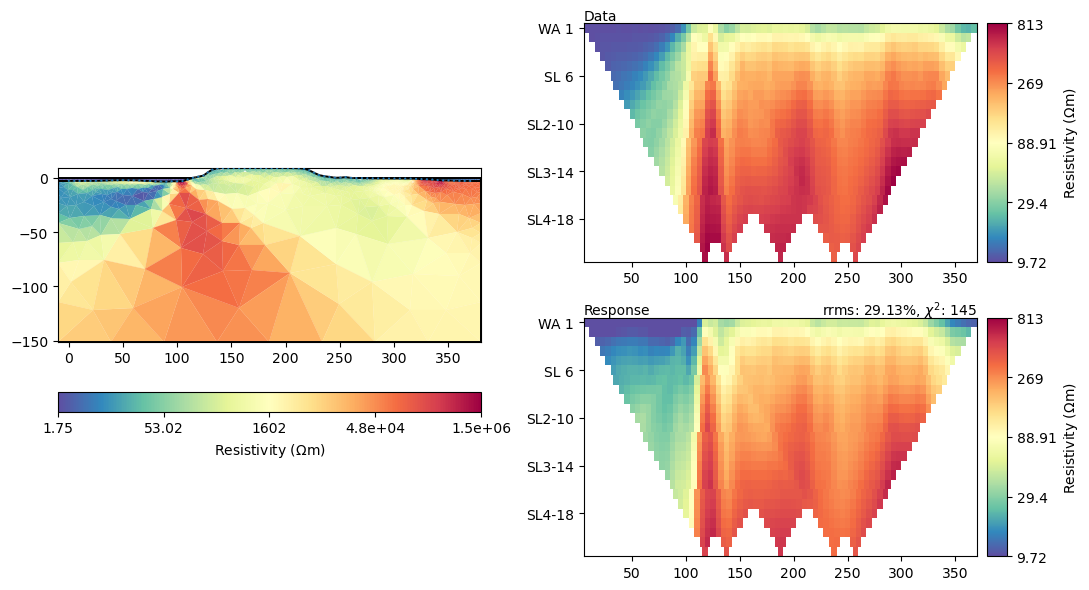

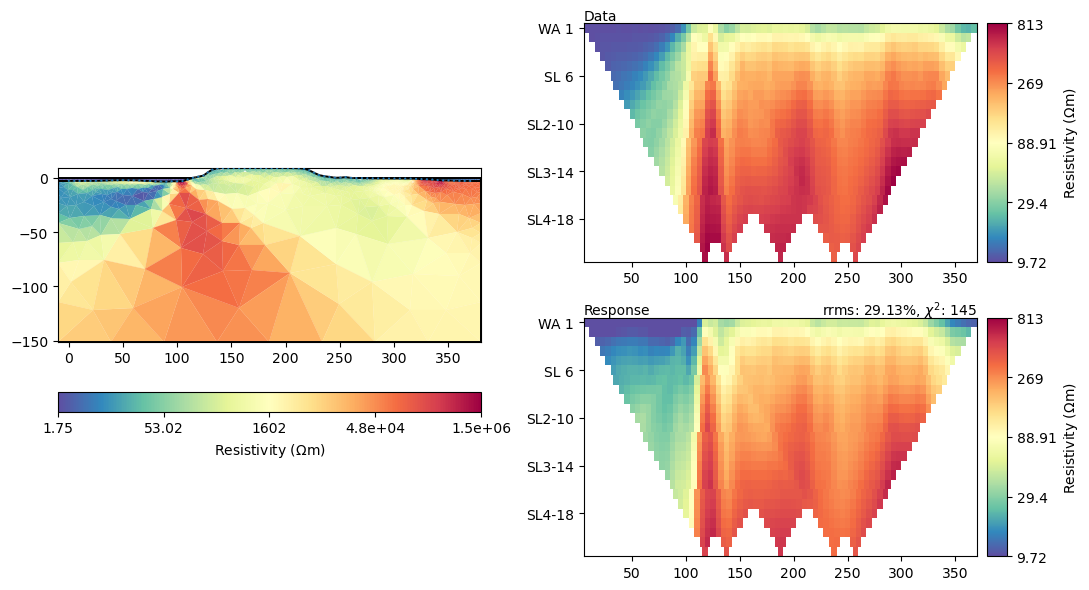

In [347]:
inv1 = mgr.invert(data3, lam=10, verbose=True)
mgr.showResultAndFit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26dfacbacd0>)

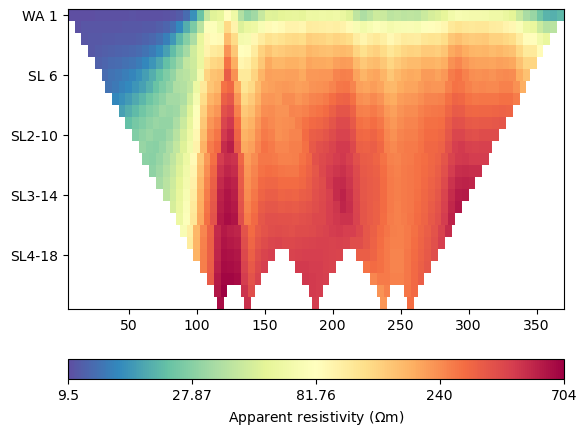

In [350]:
data4 = ert.simulate(mesh_mod, scheme=data, res=rhomap3)
ert.show(data4)

14/05/24 - 10:44:48 - pyGIMLi - INFO - Use median(data values)=239.1450735109913
14/05/24 - 10:44:48 - pyGIMLi - INFO - Created startmodel from forward operator: 9083, min/max=239.145074/239.145074
14/05/24 - 10:44:48 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026A4922C4A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026A4716F790>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000026DFA57A8F0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000026DFA57A340>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000026DFA57A420>
min/max (data): 9.5/704
min/max (error): 3%/9.07%
min/max (start model): 239/239
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  699.04
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  359.02 (dPhi = 48.60%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  195.34 (dPhi = 45.07%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  173.87 (dPhi = 11.04%) lam: 10.0
-------

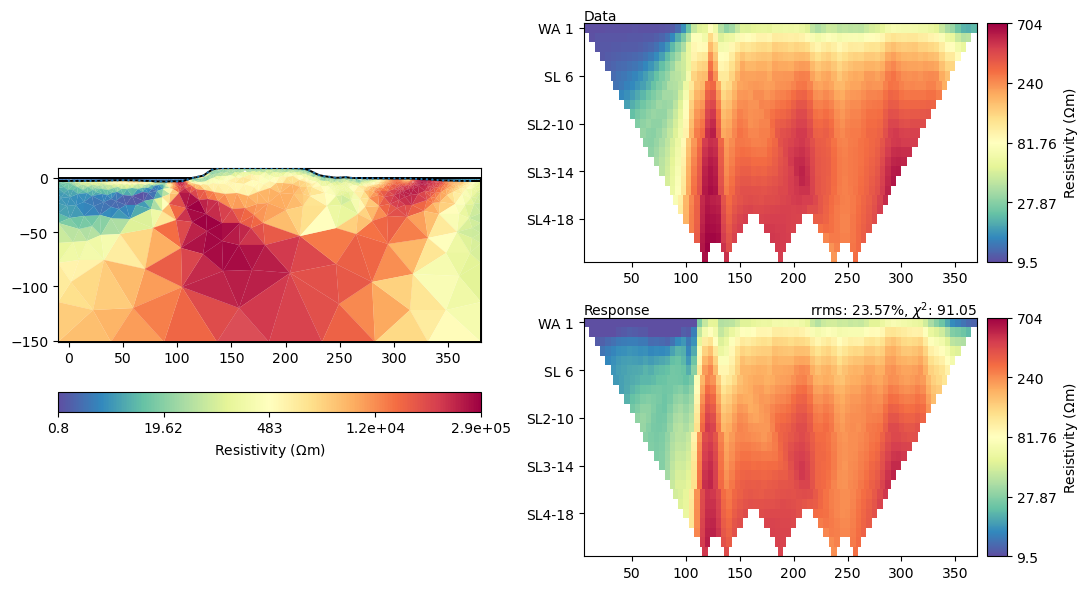

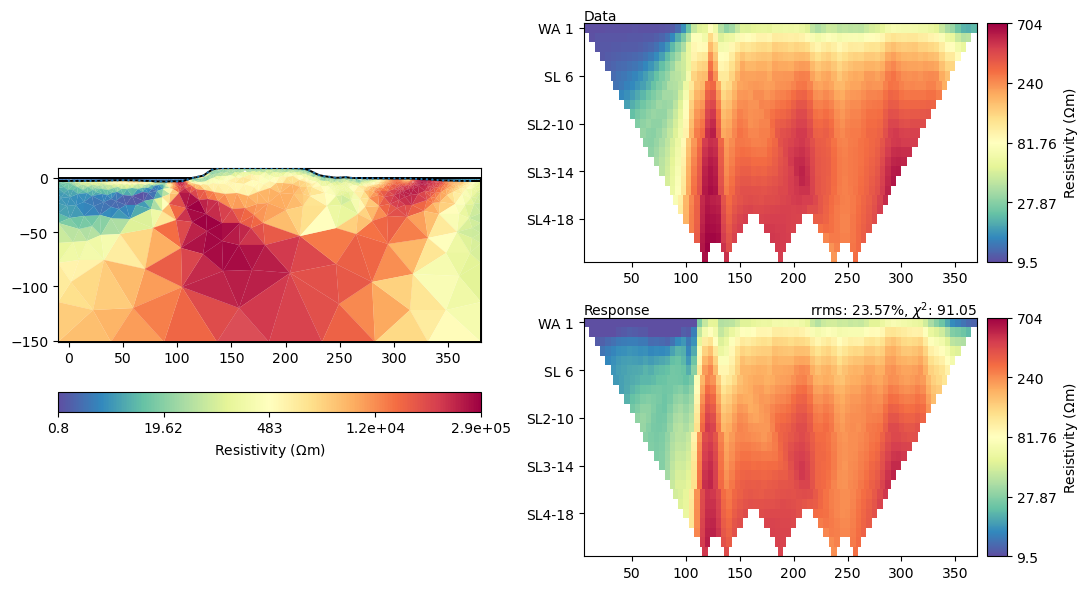

In [351]:
inv2 = mgr.invert(data4, lam=10, verbose=True)
mgr.showResultAndFit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26df9111410>)

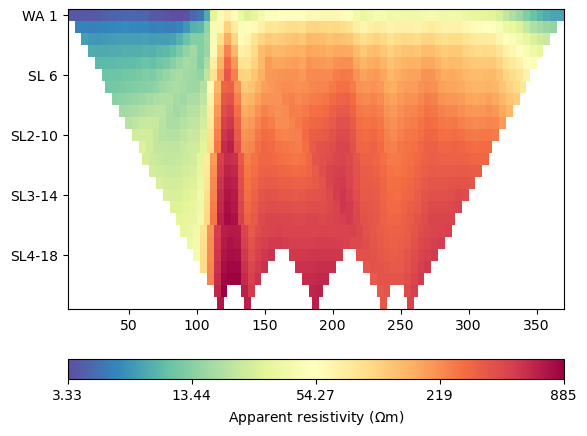

In [363]:
data5 = ert.simulate(mesh_mod, scheme=data, res=rhomap4)
ert.show(data5)

14/05/24 - 11:19:43 - pyGIMLi - INFO - Use median(data values)=210.51782042500952
14/05/24 - 11:19:43 - pyGIMLi - INFO - Created startmodel from forward operator: 9083, min/max=210.517820/210.517820
14/05/24 - 11:19:43 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026A4922C4A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026A4716F790>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000026E038EE6C0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000026E038EC890>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x0000026E038EE960>
min/max (data): 3.33/885
min/max (error): 3%/9.07%
min/max (start model): 211/211
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1156.89
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  213.59 (dPhi = 81.48%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   76.04 (dPhi = 64.19%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   22.99 (dPhi = 69.22%) lam: 10.0
------

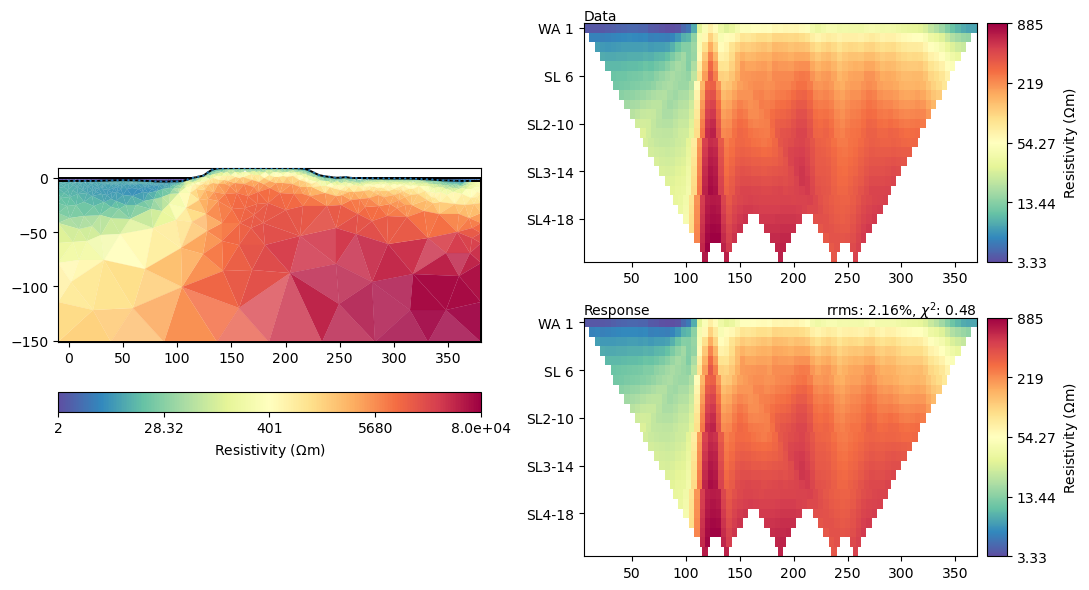

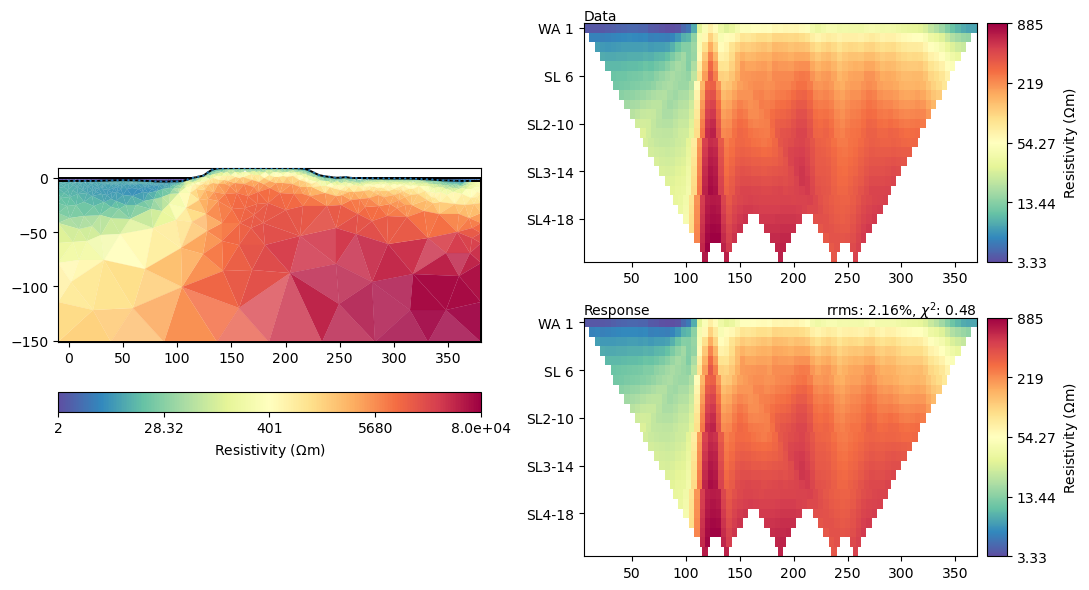

: 

In [364]:
inv3 = mgr.invert(data5, lam=10, verbose=True)
mgr.showResultAndFit()

0 -10.0 -2.524
1 -10.0 -150.8110641508107
2 380.40414484508244 -150.8110641508107
3 380.40414484508244 -2.649406212777715
4 -380.40414484508244 -2.524
5 -380.40414484508244 -521.0898027831155
6 750.8082896901649 -2.649406212777715
7 750.8082896901649 -521.2152089958932
8 0.0 -2.524
9 1.2499516028108906 -2.5349995741047358
10 3.749854808432672 -2.5569987223142077
11 4.999806411243562 -2.5679982964189434
12 6.249658216467371 -2.587245694797942
13 8.749361826914988 -2.625740491555939
14 9.999213632138797 -2.6449878899349377
15 11.249135228533955 -2.630993997401589
16 13.74897842132427 -2.603006212334891
17 14.998900017719428 -2.5890123198015424
18 16.24887898062829 -2.581760956840592
19 18.748836906446023 -2.567258230918692
20 19.998815869354885 -2.5600068679577417
21 21.24880946594051 -2.556006118763748
22 23.74879665911176 -2.548004620375762
23 24.998790255697386 -2.5440038711817685
24 26.24797223120185 -2.4987934640590033
25 28.746336182210783 -2.408372649813473
26 29.995518157715246 -

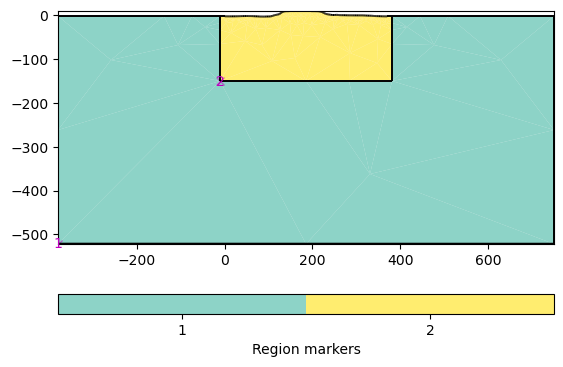

In [11]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, boundary=1, balanceDepth=True)
ax, _ = pg.show(plc)

for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


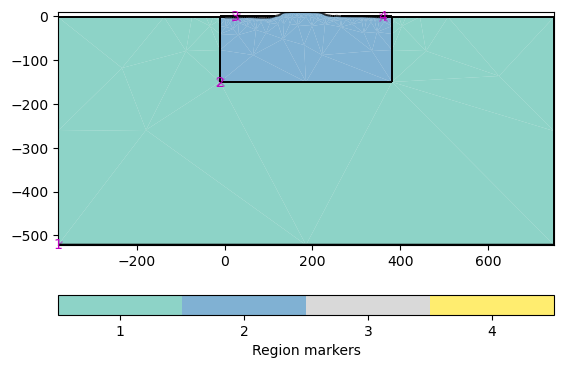

In [7]:
l1 = mt.createLine([-10,0], [-10, -5])
l2 = mt.createLine([-10,0], [114.46263419360339, 0])
l3 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0])
l4 = mt.createLine([380.40414484508244,0], [380.40414484508244, -5])

plc2 = mt.mergePLC([plc, l1, l2, l3, l4])
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
#ax.set_ylim(-5)
#ax.set_xlim(-11,381)

08/05/24 - 09:12:01 - pyGIMLi - INFO - Found 4 regions.
08/05/24 - 09:12:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/05/24 - 09:12:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 19709 Cells: 37296 Boundaries: 29032
08/05/24 - 09:12:03 - pyGIMLi - INFO - Use median(data values)=421.875
08/05/24 - 09:12:03 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=421.875000/421.875000
08/05/24 - 09:12:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000227BC2DBCE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000227FF7C4590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF1B0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF220>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF290>
min/max (data): 1.82/4413
min/max (error): 3%/9.07%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2447.59
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  829.26 (dPhi = 66.11%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  639.60 (dPhi = 22.87%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  260.72 (dPhi = 59.19%) lam: 10.0
-----

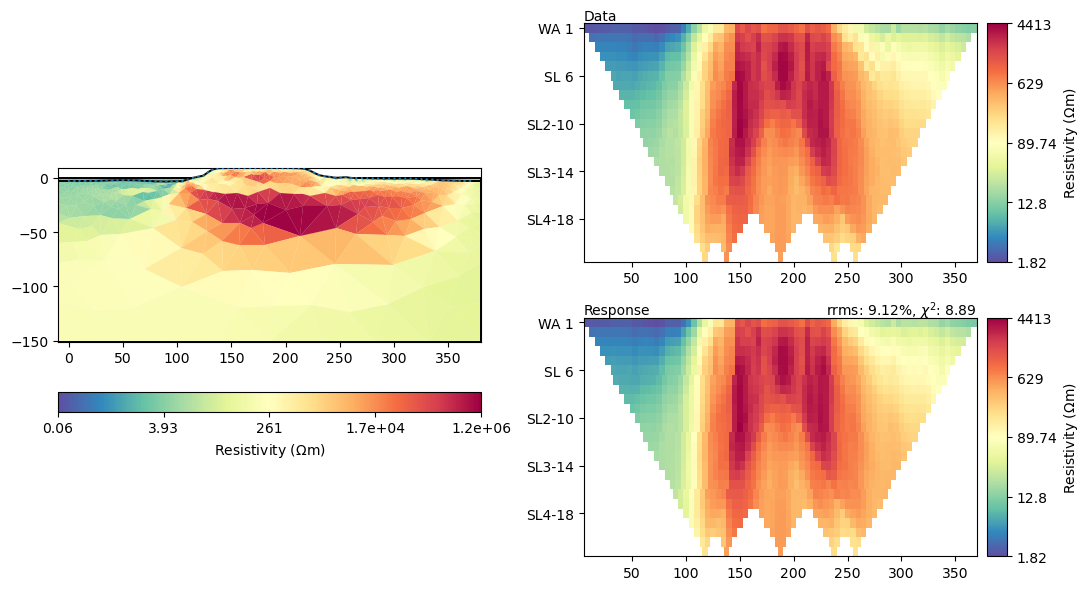

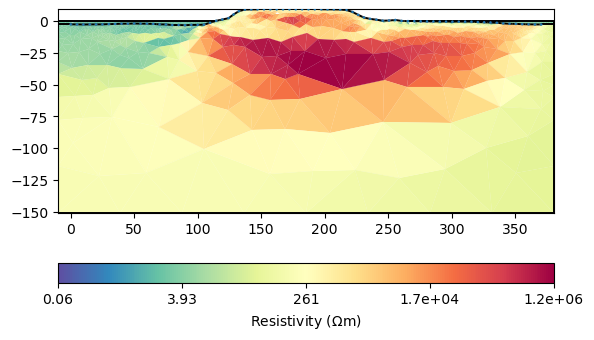

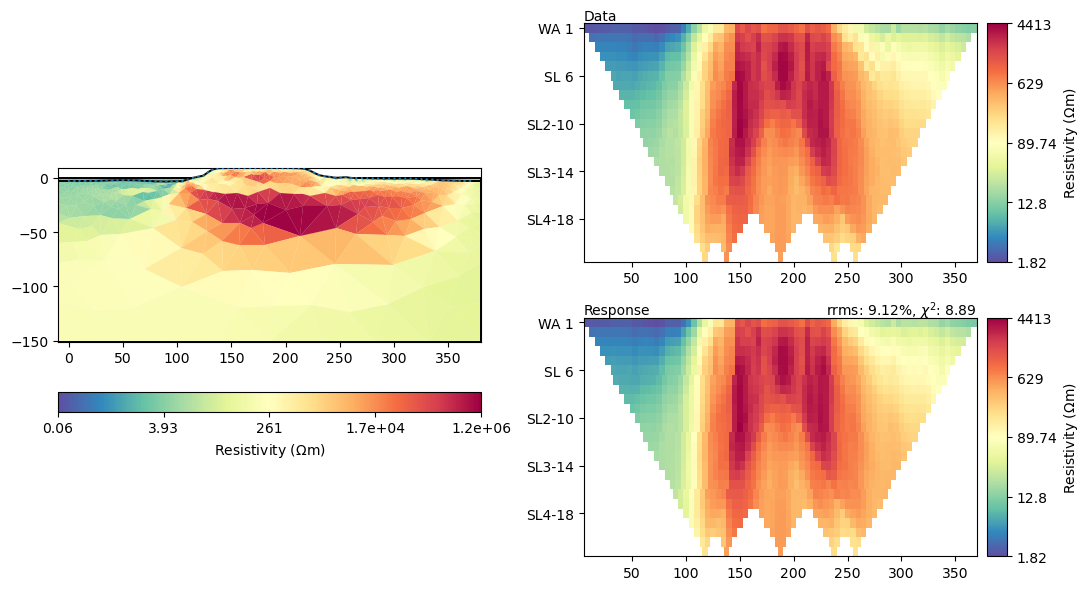

In [10]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[1, 2])
mgr.inv.setRegularization(4, limits=[3, 4])

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, zWeight=0.1, RobustData=True, BlockyModel=True)

mgr.showResult()
mgr.showResultAndFit()

(-40.0, 10.28)

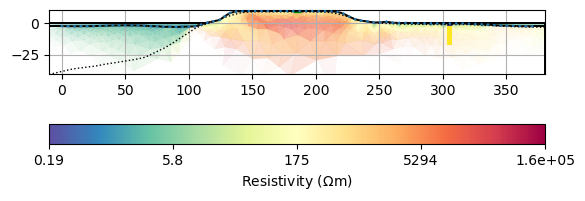

In [24]:
from pygimli.viewer.mpl import draw1DColumn

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
AL = np.loadtxt(dir + "pygimli/AL_eastern.txt")

x = borehole4['x']
z = borehole4['z']
r = borehole4['r']

x_AL = AL[0]
z_AL = AL[1]

ax, cb = mgr.showResult()
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, **colkw)
ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g_', linewidth=0.1)
ax.grid(True)
ax.set_ylim(-40)

In [ ]:
ddir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/mehriban/10_Aug_KamikF38/res2dinv_inputs/'
dd = ert.load(ddir+'DD_ele_nogps.dat')
dd.save(ddir+"dd.txt", "a b m n err rhoa")
print(open(ddir+"dd.txt").read())



In [ ]:
ws = ert.load(ddir+"WS_ele_gps_noerror.dat")
ws.save(ddir+"ws.txt", "a b m n err rhoa")
print(open(ddir+"ws.txt").read())

In [ ]:
wsrec = ert.load(ddir+"WS_rec_ele_nogps_noerror.dat")
wsrec.save(ddir+"wsrec.txt", "a b m n err rhoa")
print(open(ddir+"wsrec.txt").read())